In [2]:
from pygenn.genn_model import (GeNNModel, init_connectivity, create_cmlf_class,
                               create_custom_sparse_connect_init_snippet_class)
from pygenn.genn_wrapper import NO_DELAY

In [3]:
model = GeNNModel("float", "tenHHRing")


In [4]:
ring_model = create_custom_sparse_connect_init_snippet_class(
    "ring",
    row_build_code=
        """
        $(addSynapse, ($(id_pre) + 1) % $(num_post));
        $(endRow);
        """,
    calc_max_row_len_func=create_cmlf_class(
        lambda num_pre, num_post, pars: 1)())

In [5]:
s_ini = {"g": -0.2}
ps_p = {"tau": 1.0, # Decay time constant [ms] 
        "E": -80.0} # Reversal potential [mV]

In [6]:
model.add_synapse_population("Pop1self", "SPARSE_GLOBALG", 10,
    pop1, pop1,
    "StaticPulse", {}, s_ini, {}, {},
    "ExpCond", ps_p, {},
    init_connectivity(ring_model, {}))

NameError: name 'pop1' is not defined

swig/python detected a memory leak of type 'CodeGenerator::SingleThreadedCPU::Backend *', no destructor found.
make: Entering directory '/home/liugangqiang/tenHHRing_CODE'
make: Leaving directory '/home/liugangqiang/tenHHRing_CODE'


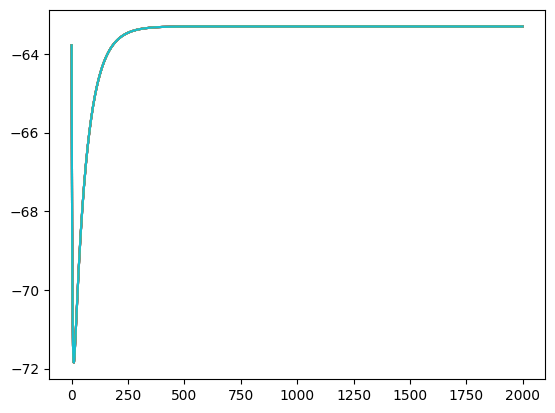

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from pygenn.genn_model import (GeNNModel, init_connectivity, create_cmlf_class,
                               create_custom_sparse_connect_init_snippet_class)
from pygenn.genn_wrapper import NO_DELAY
ring_model = create_custom_sparse_connect_init_snippet_class(
    "ring",
    row_build_code=
        """
        $(addSynapse, ($(id_pre) + 1) % $(num_post));
        $(endRow);
        """,
    calc_max_row_len_func=create_cmlf_class(
        lambda num_pre, num_post, pars: 1)())
model = GeNNModel("float", "tenHHRing")
model.dT = 0.1
p = {"gNa": 7.15,   # Na conductance in [muS]
     "ENa": 50.0,   # Na equi potential [mV]
     "gK": 1.43,    # K conductance in [muS]
     "EK": -95.0,   # K equi potential [mV] 
     "gl": 0.02672, # leak conductance [muS]
     "El": -63.563, # El: leak equi potential in mV, 
     "C": 0.143}    # membr. capacity density in nF
ini = {"V": -60.0,      # membrane potential
       "m": 0.0529324,  # prob. for Na channel activation
       "h": 0.3176767,  # prob. for not Na channel blocking
       "n": 0.5961207}  # prob. for K channel activation
s_ini = {"g": -0.2}
ps_p = {"tau": 1.0, # Decay time constant [ms] 
        "E": -80.0} # Reversal potential [mV]
pop1 = model.add_neuron_population("Pop1", 10, "TraubMiles", p, ini)
model.add_synapse_population("Pop1self", "SPARSE_GLOBALG", 10,
    pop1, pop1,
    "StaticPulse", {}, s_ini, {}, {},
    "ExpCond", ps_p, {},
    init_connectivity(ring_model, {}))
model.build()
model.load()
v = np.empty((2000, 10))
v_view = pop1.vars["V"].view
while model.t < 200.0:
    model.step_time()
    pop1.pull_var_from_device("V")
    
    v[model.timestep - 1,:]=v_view[:]
fig, axis = plt.subplots()
axis.plot(v)
plt.show()

In [1]:
import dataset
from config import base_path,data_path
import matplotlib.pyplot as plt

def get_population_list():
    '''
    Create a list of neuron population names, 
    where each name represents a combination of a neuron type and a layer type.
    '''
    
    pop_list = []
    neuron_types = ["E","S","P","V"]
    layer_types = ["1","23","4","5","6"]
    for layer_type in layer_types:
        if layer_type == "1":
            pop_list.append("H1")
        else:
            for neuron_type in neuron_types:
                pop_list.append(neuron_type+layer_type)
    return pop_list

def get_population_list_TH():
    '''
    Create a list of neuron population names of TH, 
    where each name represents a combination of a neuron type and a layer type.
    '''    
    
    pop_list = []
    neuron_types = ["E","S","P","V"]
    layer_types = ["1","23","5","6"]
    for layer_type in layer_types:
        if layer_type == "1":
            pop_list.append("H1")
        else:
            for neuron_type in neuron_types:
                pop_list.append(neuron_type+layer_type)
    return pop_list

pop_list_norm = get_population_list()
pop_list_TH = get_population_list_TH()

ModuleNotFoundError: No module named 'config'

In [1]:
import dataset
from config import base_path,data_path
import matplotlib.pyplot as plt

def get_population_list():
    '''
    Create a list of neuron population names, 
    where each name represents a combination of a neuron type and a layer type.
    '''
    
    pop_list = []
    neuron_types = ["E","S","P","V"]
    layer_types = ["1","23","4","5","6"]
    for layer_type in layer_types:
        if layer_type == "1":
            pop_list.append("H1")
        else:
            for neuron_type in neuron_types:
                pop_list.append(neuron_type+layer_type)
    return pop_list

def get_population_list_TH():
    '''
    Create a list of neuron population names of TH, 
    where each name represents a combination of a neuron type and a layer type.
    '''    
    
    pop_list = []
    neuron_types = ["E","S","P","V"]
    layer_types = ["1","23","5","6"]
    for layer_type in layer_types:
        if layer_type == "1":
            pop_list.append("H1")
        else:
            for neuron_type in neuron_types:
                pop_list.append(neuron_type+layer_type)
    return pop_list

pop_list_norm = get_population_list()
pop_list_TH = get_population_list_TH()

In [8]:
param_name = 'S5' 
block_id = 5
with dataset.connect(f'sqlite:///{data_path}/dataset.db') as db:
    
    # 遍历所有表（可选）
    # for table_name in db.tables:
        # print(f"Table: {table_name}")
        
        # for row in db[table_name]:
        #     print(row)
    
    for row in db[table_name]:
        print(row)
    
    if len(list(db[param_name].find(param_value=block_id)))>0:
        print("{} of {} has been simulated".format(param_name,block_id))


Table: E23conmultiple
OrderedDict([('id', 1), ('label', '1ff6206fefa781b8ea05efc7b47ddfdd'), ('param_value', 0), ('H1_V1', 0.08054036667738823), ('E23_V1', 0.026363601221539294), ('S23_V1', 4.187103594080338), ('P23_V1', 0.0), ('V23_V1', 0.0), ('E4_V1', 0.10473356198203729), ('S4_V1', 0.0), ('P4_V1', 0.9106153190279949), ('V4_V1', 4.684237202230107), ('E5_V1', 0.1657417684054754), ('S5_V1', 0.0012610340479192938), ('P5_V1', 0.7515705311250714), ('V5_V1', 3.4550898203592815), ('E6_V1', 0.3298155636650557), ('S6_V1', 1.3029394121175766), ('P6_V1', 1.9142512077294687), ('V6_V1', 1.5695364238410596)])
OrderedDict([('id', 2), ('label', '3f21bbdf51a8ecd1e8be1485a246597d'), ('param_value', 3), ('H1_V1', 0.025088452878739145), ('E23_V1', 0.012833893849781591), ('S23_V1', 5.132135306553911), ('P23_V1', 0.0), ('V23_V1', 0.0), ('E4_V1', 0.12475144462386399), ('S4_V1', 0.0), ('P4_V1', 0.9717209037942305), ('V4_V1', 4.709579320831222), ('E5_V1', 0.16907140214576397), ('S5_V1', 0.011349306431273645)